In [1]:

# pip install tensorflow
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

# Import NumPy
import numpy as np

# pip install pandas
import pandas as pd

# pip install seaborn
import seaborn as sns

# pip install matplotlib
import matplotlib.pyplot as plt

# pip install -U scikit-learn
# Used to split data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Multiple math functions
from tensorflow import math

from keras.utils.vis_utils import plot_model

In [7]:
gun_crime_data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv")
gun_crime_data.head()

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no


In [12]:
gun_crime_data.isna().sum()
gun_crime_data = gun_crime_data.dropna()
#testscore_data

gun_crime_clean = gun_crime_data.copy()
del gun_crime_clean["Unnamed: 0"]
del gun_crime_clean["state"]
del gun_crime_clean["law"]
gun_crime_clean

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density
0,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552
1,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567
2,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245
3,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829
4,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187
...,...,...,...,...,...,...,...,...,...,...,...
1168,1995,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927
1169,1996,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944
1170,1997,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943
1171,1998,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944


In [14]:
print(gun_crime_clean.describe())

              year      violent       murder      robbery    prisoners  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean   1988.000000   503.074680     7.665132   161.820205   226.579710   
std       6.636079   334.277194     7.522710   170.509962   178.888094   
min    1977.000000    47.000000     0.200000     6.400000    19.000000   
25%    1982.000000   283.100000     3.700000    71.100000   114.000000   
50%    1988.000000   443.000000     6.400000   124.100000   187.000000   
75%    1994.000000   650.900000     9.800000   192.700000   291.000000   
max    1999.000000  2921.800000    80.600000  1635.100000  1913.000000   

              afam         cauc         male   population        income  \
count  1173.000000  1173.000000  1173.000000  1173.000000   1173.000000   
mean      5.336217    62.945432    16.081127     4.816341  13724.796066   
std       4.885688     9.761527     1.732143     5.252115   2554.542334   
min       0.248207    21.780430  

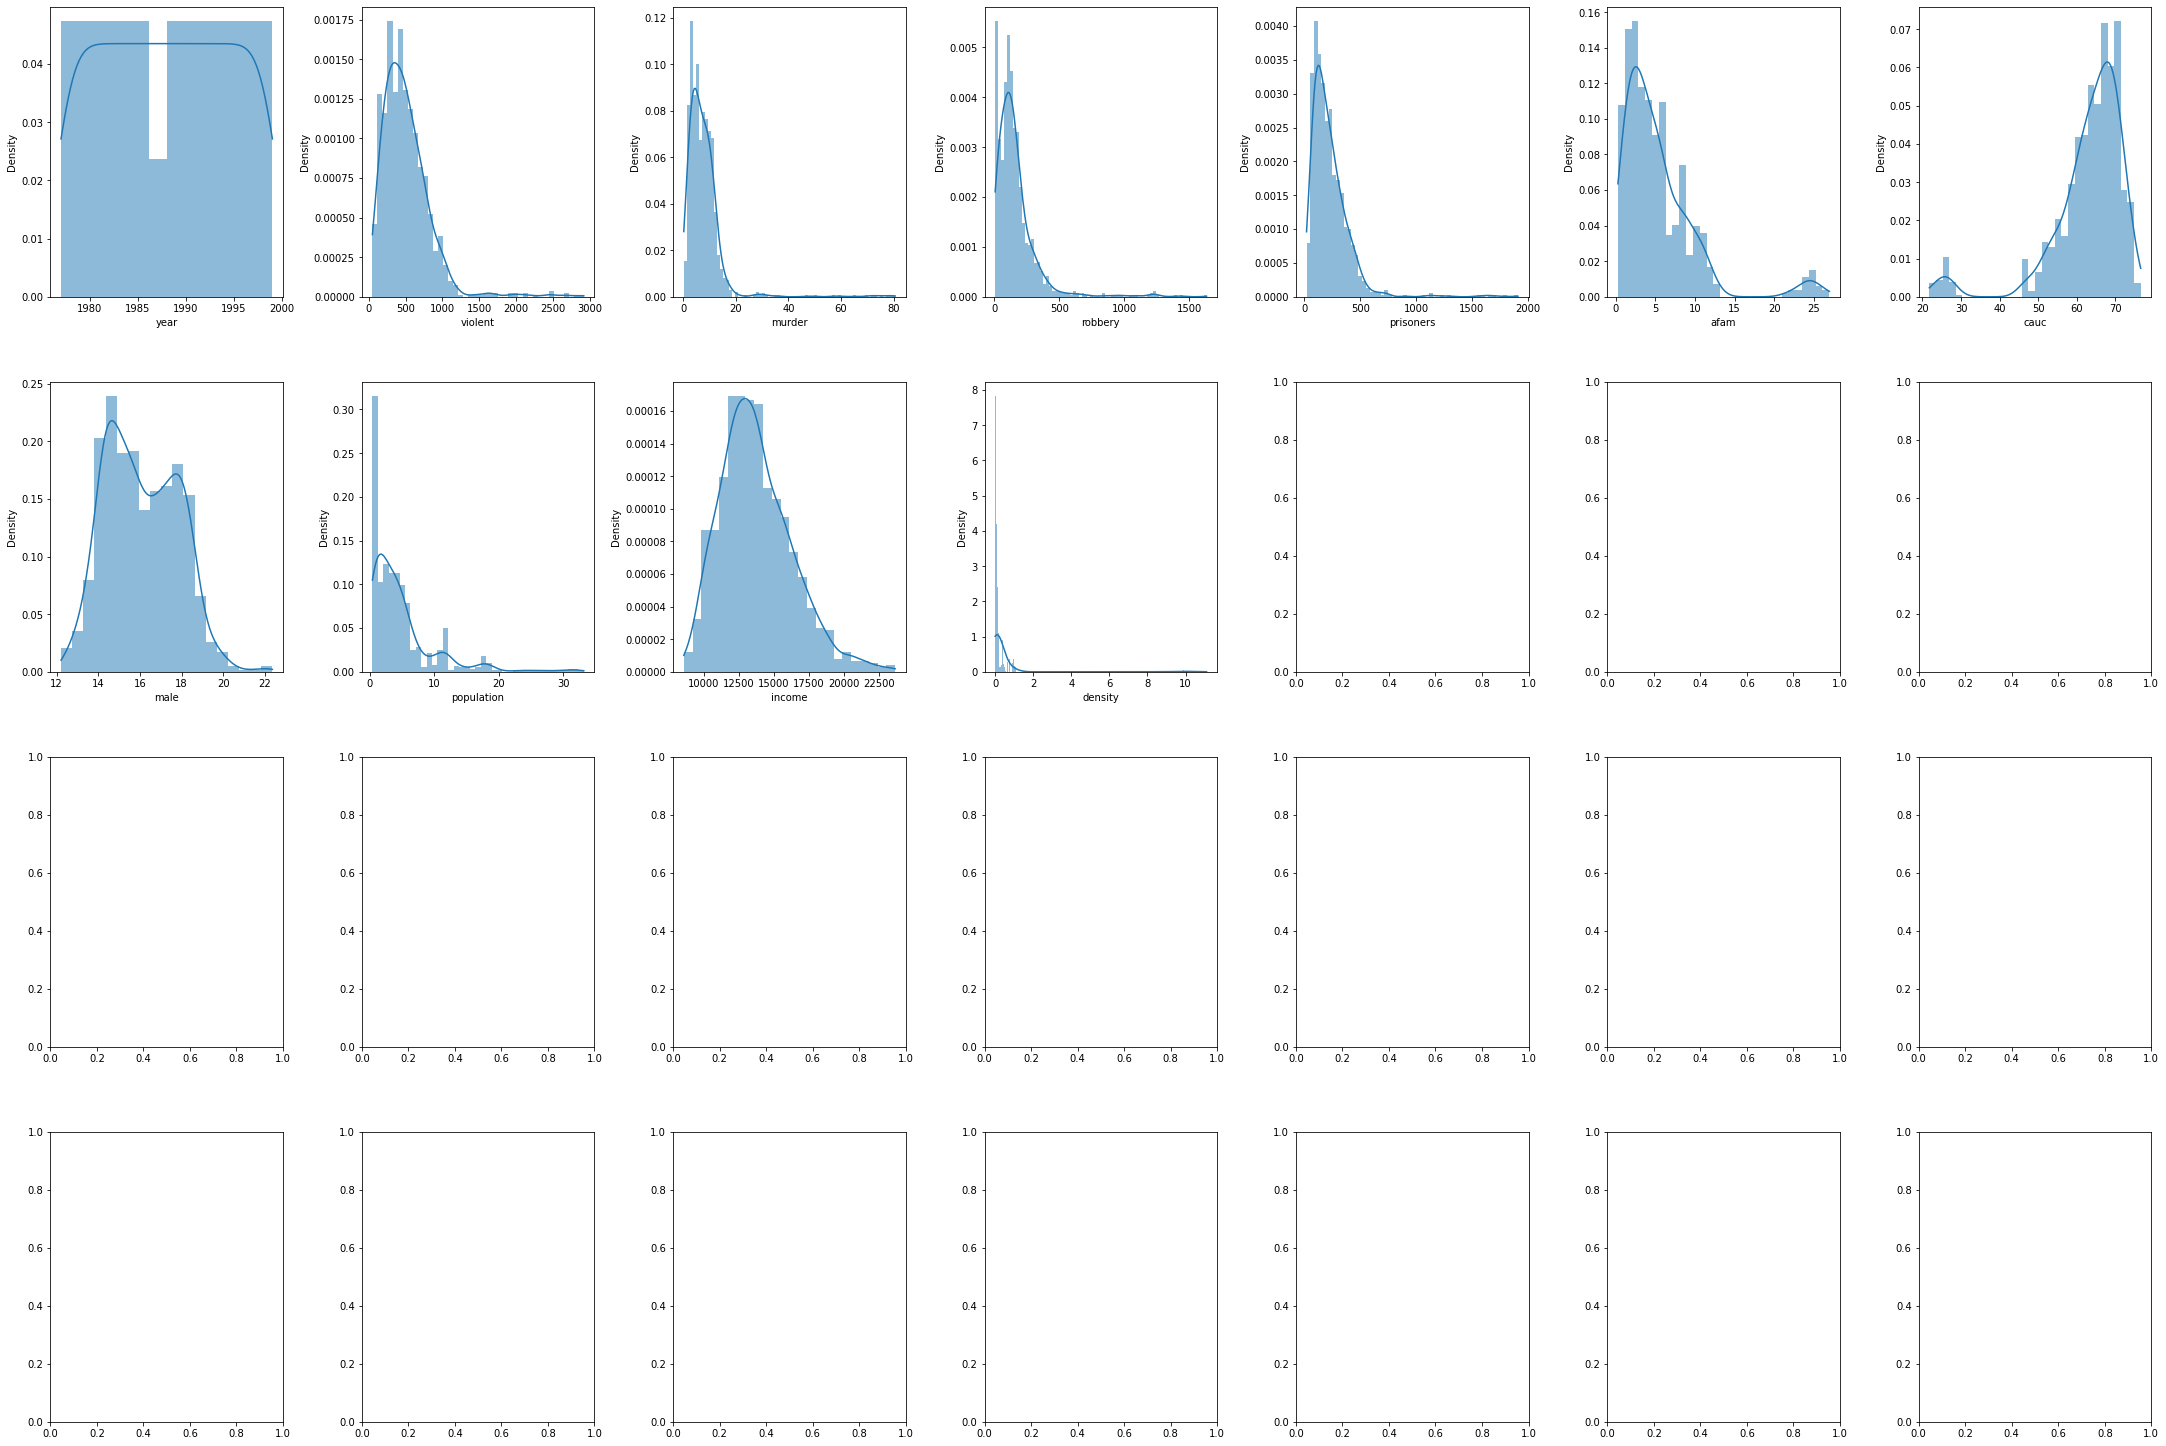

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in gun_crime_clean.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

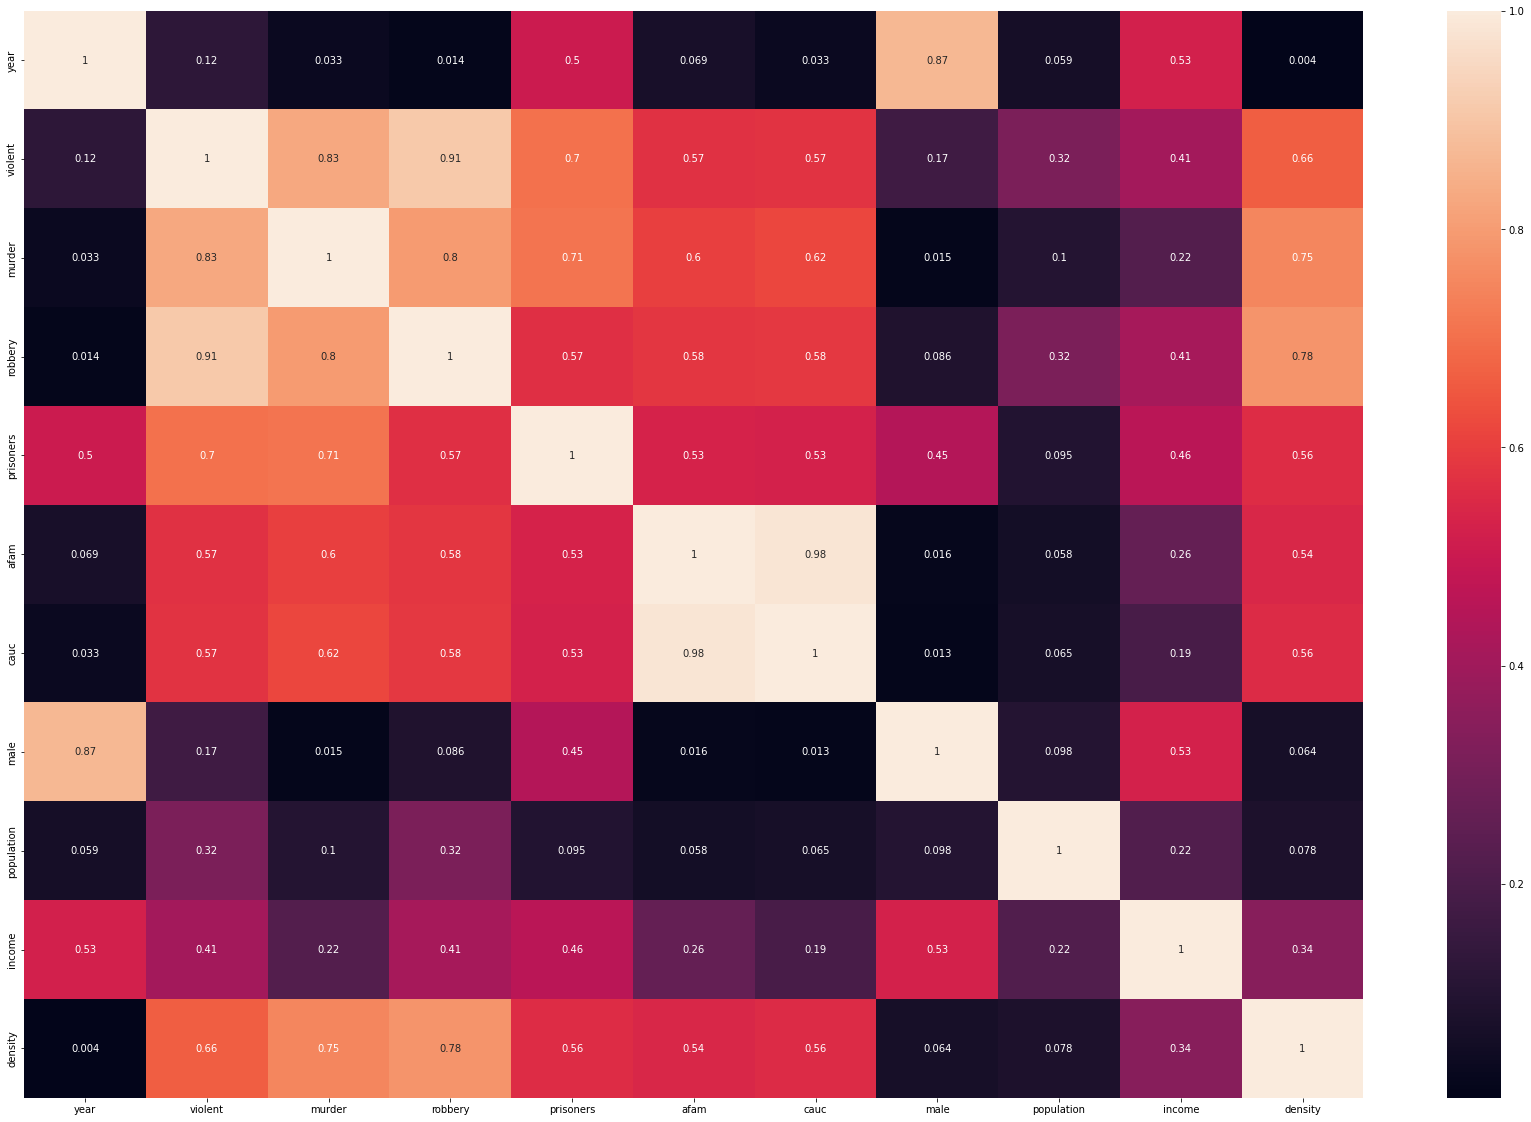

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(gun_crime_clean.corr().abs(), annot=True)


In [19]:
for k, v in gun_crime_clean.items():
        # Identify the 1st quartile
        q1 = v.quantile(0.25)
        # Identify the 3rd quartile
        q3 = v.quantile(0.75)
        # Get your interquartile range
        iqr = q3 - q1
        # Lower fence is q1 - (1.5 * iqr)
        # Upper fence is q3 + (1.5 * iqr)
        # Store outliers if they are above these fences
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        # Calculate the percentage of total outliers
        perc = np.shape(v_col)[0] * 100.0 / np.shape(gun_crime_clean)[0]
        print("%s Outliers = %.2f%%" % (k, perc))

year Outliers = 0.00%
violent Outliers = 2.22%
murder Outliers = 2.22%
robbery Outliers = 5.80%
prisoners Outliers = 2.47%
afam Outliers = 3.92%
cauc Outliers = 3.92%
male Outliers = 0.26%
population Outliers = 6.82%
income Outliers = 2.13%
density Outliers = 11.76%


In [20]:
ct = make_column_transformer(
    (MinMaxScaler(),["robbery","violent","prisoners"]))

In [25]:
X = gun_crime_clean.drop("murder",axis=1)
y = gun_crime_clean["murder"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=66)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [34]:

tf.random.set_seed(66)

gun_model = tf.keras.Sequential([
  # 4 hidden layers with 3 having 100 neurons (Outputs)
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])


gun_model.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Take the data and try to fit the data with 100 tries creating a trained model
# Fit the model for 200 epochs (Save so we can plot this)
# An epoch is a full iteration over the training data
fit_data = gun_model.fit(X_train_normal, y_train, epochs=100, verbose=0) 

In [35]:
gun_model_loss, gun_model_mae = gun_model.evaluate(X_test_normal, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 3.9175 - mae: 3.9175
